Nama : Garnis Kirani

NIM : 2106077 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score
  
dataset = pd.read_csv('weght.csv')

print('Sample Data :')
dataset.head()

Sample Data :


,weighting.dat (1),weighting.dat (2),weighting.dat (3),weighting.dat (4),weighting.dat (5),weighting.dat (6),weighting.dat (7)
0,2.522084,9.912066,5.473721,9.708924,3.055777,3.379995,negative
1,7.858883,7.722865,6.137092,5.414700,4.316394,5.141432,positive
2,0.116719,5.276446,0.900902,6.577496,4.379008,2.075299,negative
3,1.913008,7.986334,3.786095,8.899318,0.909737,6.283413,negative
4,4.923303,2.889413,9.938024,2.145686,2.630900,7.894478,negative


In [ ]:
dataset.isna().sum()

weighting.dat (1)    0
weighting.dat (2)    0
weighting.dat (3)    0
weighting.dat (4)    0
weighting.dat (5)    0
weighting.dat (6)    0
weighting.dat (7)    0
dtype: int64

In [ ]:
dataset.dtypes

weighting.dat (1)    float64
weighting.dat (2)    float64
weighting.dat (3)    float64
weighting.dat (4)    float64
weighting.dat (5)    float64
weighting.dat (6)    float64
weighting.dat (7)     object
dtype: object

In [8]:
x = dataset.iloc[:, :4]
y = dataset['weighting.dat (7)']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

[Text(0.45564516129032256, 0.9375, 'x[0] <= 4.577\ngini = 0.498\nsamples = 350\nvalue = [163, 187]'),
 Text(0.24193548387096775, 0.8125, 'x[0] <= 3.083\ngini = 0.228\nsamples = 145\nvalue = [126, 19]'),
 Text(0.12903225806451613, 0.6875, 'x[1] <= 0.268\ngini = 0.092\nsamples = 104\nvalue = [99, 5]'),
 Text(0.06451612903225806, 0.5625, 'x[0] <= 1.251\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.03225806451612903, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0967741935483871, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1935483870967742, 0.5625, 'x[2] <= 1.365\ngini = 0.058\nsamples = 100\nvalue = [97, 3]'),
 Text(0.16129032258064516, 0.4375, 'x[1] <= 3.199\ngini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.12903225806451613, 0.3125, 'x[0] <= 1.802\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.0967741935483871, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.16129032258064516, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),


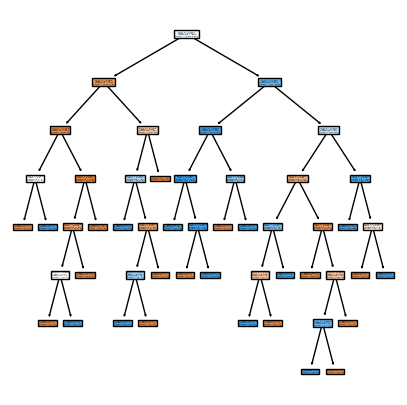

In [10]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)

In [11]:
KMeans = KMeans(n_clusters=3)
labels = KMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

1.6477168894435252


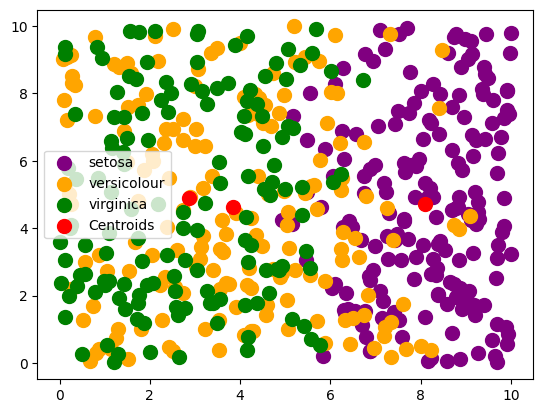

In [13]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
            x.loc[labels == 0, cols[1]],
            s=100, c='purple',
            label='setosa')
plt.scatter(x.loc[labels == 1, cols[0]],
            x.loc[labels == 1, cols[1]],
            s=100, c='orange',
            label='versicolour')
plt.scatter(x.loc[labels == 2, cols[0]],
            x.loc[labels == 2, cols[1]],
            s=100, c='green',
            label='virginica')
plt.scatter(KMeans.cluster_centers_[:, 0],
            KMeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')
plt.legend()
